In [1]:
import pandas as pd

In [2]:
df_scoring = pd.read_pickle('pickle/scoring.pickle')
df_teamsplits = pd.read_pickle('pickle/teamsplits.pickle')

In [3]:
df_scoring.sample(5)

,playerID,year,tmID,GP,G,A,Pts,SOG
27531,mckenst01,1999,LAK,46.0,0.0,5.0,5.0,14.0
12960,gagnesa01,2007,EDM,79.0,13.0,36.0,49.0,135.0
12027,fischji01,2005,DET,22.0,3.0,5.0,8.0,36.0
28244,michazb01,2010,PIT,73.0,5.0,14.0,19.0,104.0
11968,finlebr01,2002,NAS,1.0,0.0,0.0,0.0,0.0


In [4]:
df_teamsplits.sample(5)

,year,tmID,SepW,SepL,SepT,SepOL,OctW,OctL,OctT,OctOL,...,FebT,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL
1151,1998,OTT,NaN,NaN,NaN,NaN,5.0,3.0,0.0,NaN,...,2.0,NaN,9.0,3.0,2.0,NaN,2.0,2.0,5.0,NaN
776,1982,LAK,NaN,NaN,NaN,NaN,5.0,4.0,3.0,NaN,...,3.0,NaN,3.0,11.0,1.0,NaN,1.0,0.0,1.0,NaN
970,1991,NYR,NaN,NaN,NaN,NaN,9.0,5.0,0.0,NaN,...,2.0,NaN,9.0,4.0,1.0,NaN,1.0,1.0,0.0,NaN
1259,2002,DET,NaN,NaN,NaN,NaN,6.0,3.0,1.0,0.0,...,1.0,1.0,13.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0
1053,1994,VAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,6.0,6.0,2.0,NaN,7.0,5.0,3.0,NaN


In [5]:
three_years = df_scoring.loc[(df_scoring.year > 2000) & (df_scoring.year <2004)]

In [6]:
three_years = three_years.drop_duplicates(subset=['playerID', 'year'])

In [7]:
counts = three_years["playerID"].value_counts()

In [8]:
# three random players with complete history between 2001-2003
ids = counts[counts == 3].sample(3).index

In [9]:
df = three_years.loc[three_years['playerID'].isin(ids)]
df_basic = df[["playerID", "year", "G"]]

In [11]:
df_basic.head()

,playerID,year,G
28731,modryja01,2001,4.0
28732,modryja01,2002,13.0
28733,modryja01,2003,5.0
35081,riccimi01,2001,19.0
35082,riccimi01,2002,11.0


In [12]:
pivot = df_basic.pivot(index='playerID', columns='year', values='G')

In [13]:
pivot

year,2001,2002,2003
playerID,,,
modryja01,4.0,13.0,5.0
riccimi01,19.0,11.0,7.0
stefapa01,7.0,13.0,14.0


In [14]:
pivot.index.name = None
pivot.columns.name = None
pivot

,2001,2002,2003
modryja01,4.0,13.0,5.0
riccimi01,19.0,11.0,7.0
stefapa01,7.0,13.0,14.0


In [15]:
pivot.index.name = 'playerID'
pivot.columns.name = 'year'
pivot

year,2001,2002,2003
playerID,,,
modryja01,4.0,13.0,5.0
riccimi01,19.0,11.0,7.0
stefapa01,7.0,13.0,14.0


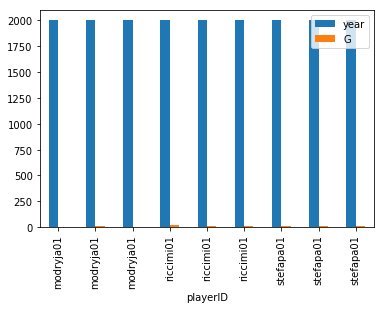

In [17]:
df_basic.set_index('playerID').plot.bar();

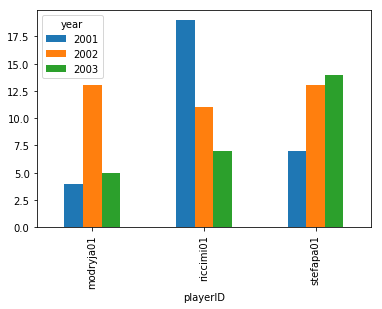

In [19]:
pivot.plot.bar();

In [20]:
pivot = pivot.reset_index()
pivot.columns.name = None
pivot

,playerID,2001,2002,2003
0,modryja01,4.0,13.0,5.0
1,riccimi01,19.0,11.0,7.0
2,stefapa01,7.0,13.0,14.0


In [21]:
pivot.melt()

,variable,value
0,playerID,modryja01
1,playerID,riccimi01
2,playerID,stefapa01
3,2001,4
4,2001,19
5,2001,7
6,2002,13
7,2002,11
8,2002,13
9,2003,5


In [22]:
pivot.melt(id_vars="playerID")

,playerID,variable,value
0,modryja01,2001,4.0
1,riccimi01,2001,19.0
2,stefapa01,2001,7.0
3,modryja01,2002,13.0
4,riccimi01,2002,11.0
5,stefapa01,2002,13.0
6,modryja01,2003,5.0
7,riccimi01,2003,7.0
8,stefapa01,2003,14.0


In [23]:
pivot.melt(id_vars="playerID", var_name="year", value_name="goals")

,playerID,year,goals
0,modryja01,2001,4.0
1,riccimi01,2001,19.0
2,stefapa01,2001,7.0
3,modryja01,2002,13.0
4,riccimi01,2002,11.0
5,stefapa01,2002,13.0
6,modryja01,2003,5.0
7,riccimi01,2003,7.0
8,stefapa01,2003,14.0


In [24]:
pivot.melt(id_vars="playerID", value_vars=[2001, 2002],
           var_name="year", value_name="goals")

,playerID,year,goals
0,modryja01,2001,4.0
1,riccimi01,2001,19.0
2,stefapa01,2001,7.0
3,modryja01,2002,13.0
4,riccimi01,2002,11.0
5,stefapa01,2002,13.0


In [26]:
df_large = df[['playerID', 'tmID', 'year', 'G']]
df_large.sample(3)

,playerID,tmID,year,G
40047,stefapa01,ATL,2003,14.0
40045,stefapa01,ATL,2001,7.0
35082,riccimi01,SJS,2002,11.0


In [27]:
try:
    df_large.pivot(index=["playerID", "tmID"],
                     columns="year", values="G")
except Exception as e:
    print(e) 

Length of passed values is 9, index implies 2


In [28]:
df_large = df[['playerID', 'tmID', 'year', 'G', 'A']]
df_large.sample(3)

,playerID,tmID,year,G,A
35081,riccimi01,SJS,2001,19.0,34.0
28733,modryja01,LAK,2003,5.0,27.0
40047,stefapa01,ATL,2003,14.0,26.0


In [29]:
pivot_test = df_large.pivot(index="playerID", columns="year",
                        values=["G", "A"])
pivot_test

G                 A            
year       2001  2002  2003  2001  2002  2003
playerID                                     
modryja01   4.0  13.0   5.0  38.0  25.0  27.0
riccimi01  19.0  11.0   7.0  34.0  23.0  19.0
stefapa01   7.0  13.0  14.0  16.0  21.0  26.0